In [23]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(style="whitegrid") # grid seaborn

pd.options.display.float_format = '{:20,.3f}'.format # notacion output

# Acceso a set de datos

In [2]:
path = "/home/seba/Escritorio/Datos/TP1/data/"
df_props_full = pd.read_csv(path + "train_dollar.csv")

In [3]:
df_props_full.columns

Index(['fecha', 'id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion',
       'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'Precio_MEX', 'MEX_to_USD', 'Precio_USD'],
      dtype='object')

# Conversión de tipos

In [4]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])

In [5]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

In [6]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

In [7]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

In [8]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
df_props_full['Precio_MEX'] = df_props_full['Precio_MEX'].astype(pd.UInt32Dtype())
df_props_full['Precio_USD'] = df_props_full['Precio_USD'].astype(pd.UInt32Dtype())

# Analisis de los tipos de Propiedades

In [9]:
tipos = df_props_full['tipodepropiedad'].value_counts()
tipos

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [10]:
len(tipos)

24

Text(0.5, 0, 'Cantidad Publicaciones')

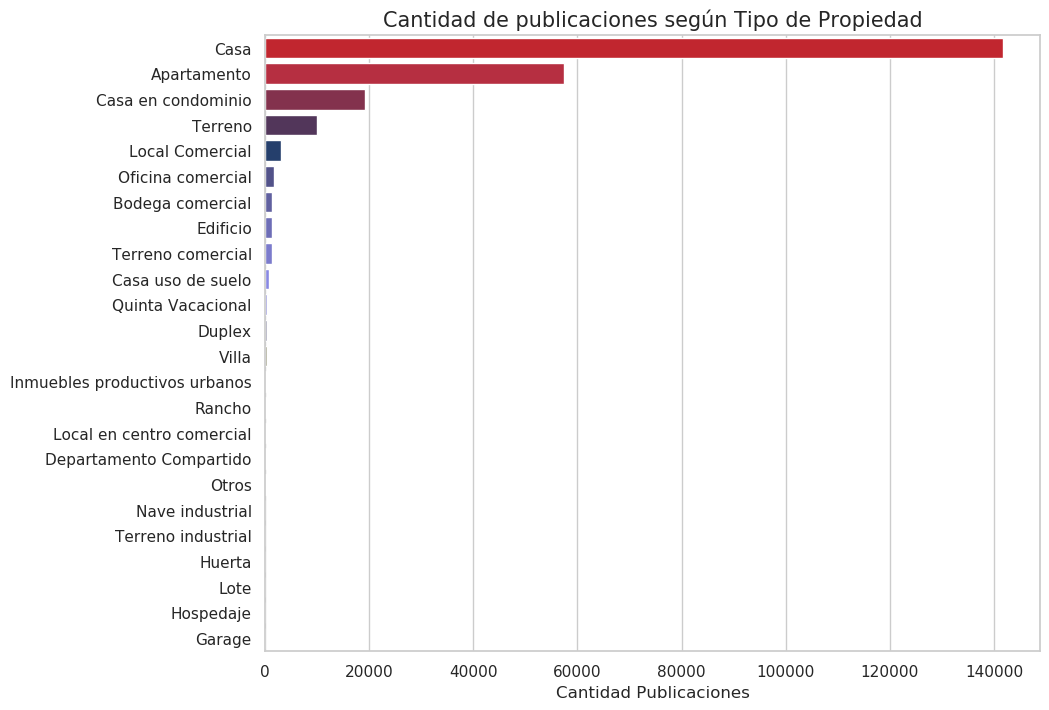

In [101]:
type_fig = sns.barplot(x=tipos, y=tipos.index, orient='h', palette = (sns.color_palette("gist_stern", 20)))
type_fig.set_title("Cantidad de publicaciones según Tipo de Propiedad", fontsize = 15)
type_fig.set_xlabel("Cantidad Publicaciones", fontsize = 12)

Observo en detalle aquellos tipos que por su baja cantidad no son apreciables

In [12]:
tipos_inf = tipos[4:-1]
tipos_inf

Local Comercial                  3055
Oficina comercial                1741
Bodega comercial                 1406
Edificio                         1396
Terreno comercial                1326
Casa uso de suelo                 708
Quinta Vacacional                 395
Duplex                            343
Villa                             340
Inmuebles productivos urbanos     200
Rancho                            170
Local en centro comercial         165
Departamento Compartido           141
Otros                             134
Nave industrial                    76
Terreno industrial                 31
Huerta                             20
Lote                                5
Hospedaje                           1
Name: tipodepropiedad, dtype: int64

Text(0.5, 0, 'Cantidad Publicaciones')

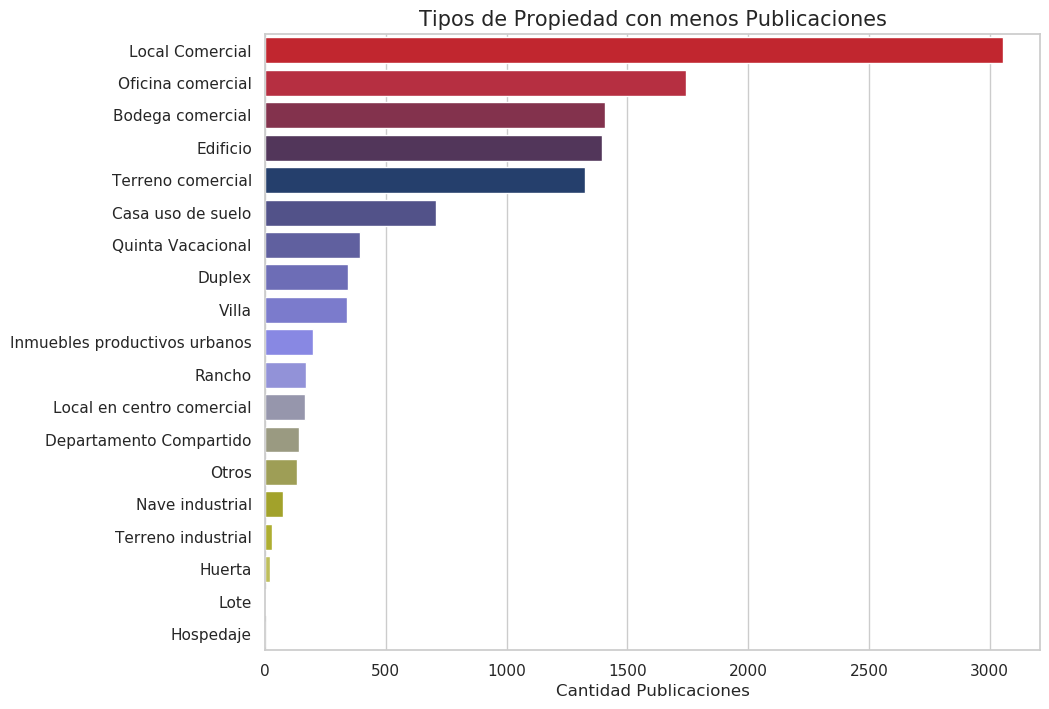

In [102]:
type_inf_fig = sns.barplot(x=tipos_inf, y=tipos_inf.index, orient='h', palette = (sns.color_palette("gist_stern", 20)))
type_inf_fig.set_title("Tipos de Propiedad con menos Publicaciones", fontsize = 15)
type_inf_fig.set_xlabel("Cantidad Publicaciones", fontsize = 12)

# Analisis de Antiguedades

In [20]:
antiguedades = df_props_full['antiguedad'].value_counts()
antiguedades = antiguedades.sort_index()
antiguedades

0     50335
1     12353
2      5059
3      5616
4      7944
      ...  
75        6
76        2
77        1
79        2
80       27
Name: antiguedad, Length: 78, dtype: int64

In [39]:
antig_new = antiguedades[0:39]
antig_old = antiguedades[39:len(antiguedades)]

Text(0.5, 0, 'Años Antigüedad')

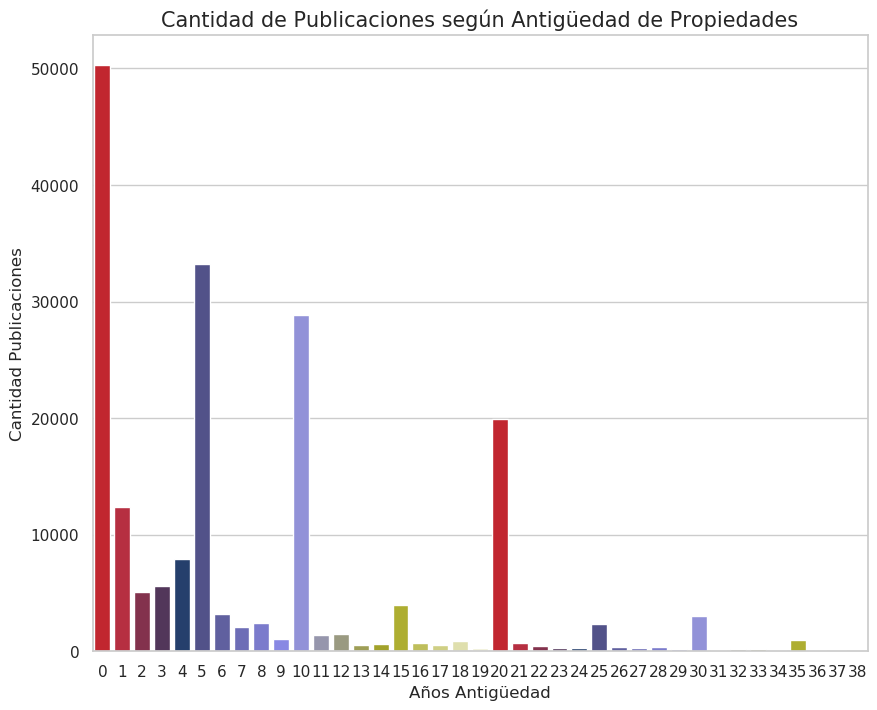

In [103]:
antig_fig = sns.barplot(x=antig_new.index, y=antig_new, orient='v', palette = (sns.color_palette("gist_stern", 20)))
antig_fig.set_title("Cantidad de Publicaciones según Antigüedad de Propiedades", fontsize = 15)
antig_fig.set_ylabel("Cantidad Publicaciones", fontsize = 12)
antig_fig.set_xlabel("Años Antigüedad", fontsize = 12)

Text(0.5, 0, 'Años Antigüedad')

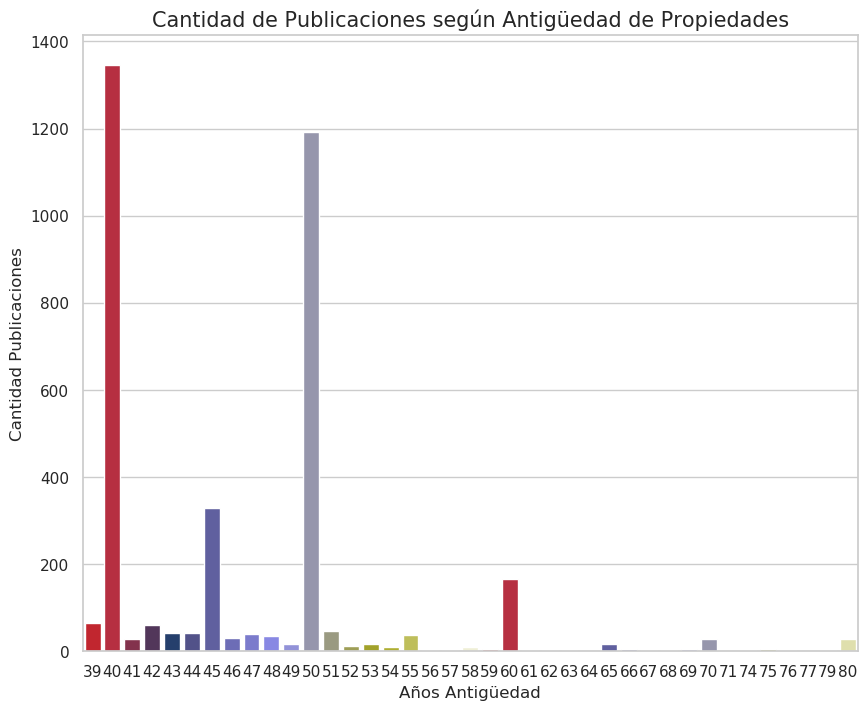

In [104]:
antig_old_fig = sns.barplot(x=antig_old.index, y=antig_old, orient='v', palette = (sns.color_palette("gist_stern", 20)))
antig_old_fig.set_title("Cantidad de Publicaciones según Antigüedad de Propiedades", fontsize = 15)
antig_old_fig.set_ylabel("Cantidad Publicaciones", fontsize = 12)
antig_old_fig.set_xlabel("Años Antigüedad", fontsize = 12)

In [ ]:
fig, axes = plt.subplots(2,1)
antig_new.to_frame().plot.bar(ax=axes[0], color='red')
antig_old.to_frame().plot.bar(ax=axes[1], color='purple')

axes[0].set_title('2012')
axes[1].set_title('2013')

fig.suptitle('Publicaciones por mes', fontsize=16)
plt.show()